In [1]:
from scipy.cluster.hierarchy import ward, complete, average, weighted, fcluster, dendrogram, linkage
from scipy.spatial.distance import pdist

from nn_chain_algorithm import nn_chain
from argmin_test import test_nn_chain
from nn_chain_algorithm_standard import standard_nn_chain

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X = np.array([[20, 16],
       [ 5, 17],
       [13, 12],
       [ 2, 17],
       [ 2, 20],
       [ 4,  5],
       [16, 13],
       [12, 13],
       [20, 17],
       [ 7, 13]])

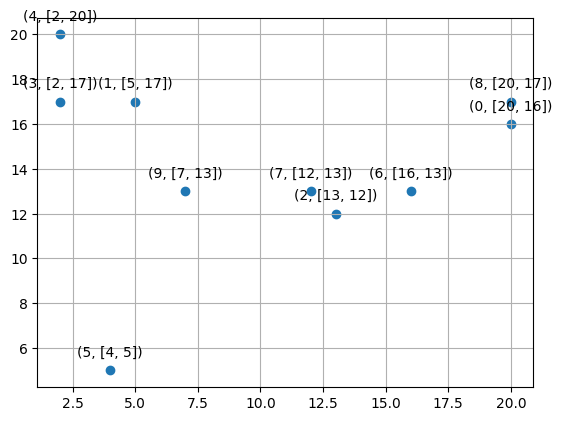

In [3]:
plt.scatter(X[:, 0], X[:, 1])
for i, c in enumerate(X):

    label = i, list(c)

    plt.annotate(label,
                 (c),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.grid()
plt.show()

In [4]:
# My original algorithm result, that pops the last element
# get the start time
st = time.process_time()
########## FIX 
A = nn_chain(X, 3)
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_original = et - st

i = 0
all distances to i = [7.51664819 4.03112887 9.01387819 9.21954446 9.70824392 2.5
 4.27200187 0.5        6.67083203]
original j = 8
knn[i] = [8 6 2], dists = [0.5        2.5        4.03112887]
j = 8

i = 8
all distances to i = [ 0.5         7.5         4.30116263  9.          9.1241438  10.
  2.82842712  4.47213595  6.80073525]
original j = 0
knn[i] = [0 6 2], dists = [0.5        2.82842712 4.30116263]
j = 0
clusters reciprocal; merging 8 and 0
centroid = [20.  16.5]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 0 8


i = 1
all distances to i = [ 4.71699057  1.5         2.12132034  6.02079729  5.85234996  4.03112887
  2.23606798 10.00555401]
original j = 3
knn[i] = [3 4 9], dists = [1.5        2.12132034 2.23606798]
j = 3

i = 3
all distances to i = [ 1.5         6.04152299  1.5         6.08276253  7.28010989  5.38516481
  3.20156212 12.00462874]
original j = 1
knn[i] = [1 4 9], dists = [1.5        1.5        3.20156212]
j = 1
clusters reciprocal; merging 3 and 1
centroid = [ 3.5 17. ]
{1, 2, 3,

In [5]:
# Using argmin
# get the start time
st = time.process_time()
########## FIX 
B = test_nn_chain(X, 3)
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_argmin = et - st

[7.51664819 4.03112887 9.01387819 9.21954446 9.70824392 2.5
 4.27200187 0.5        6.67083203] [1 2 3 4 5 6 7 8 9] 0
------------
cluster_chain = [0], chain_length = 1 ==> 0
m  = 0
i = 0, j = 8
knn = [8 6 2], dists = [0.5        2.5        4.03112887]
------------
cluster_chain = [0 8], chain_length = 2 ==> 8
m  = 0
i = 8, j = 0
knn = [0 6 2], dists = [0.49999    2.82842712 4.30116263]

merging (8, 0)
centroid of 8, 0 = [20.  16.5]


[ 4.71699057  1.5         2.12132034  6.02079729  5.85234996  4.03112887
  2.23606798 10.00555401] [ 2  3  4  5  6  7  9 10] 1
------------
cluster_chain = [1], chain_length = 1 ==> 1
m  = 0
i = 1, j = 3
knn = [3 4 9], dists = [1.5        2.12132034 2.23606798]
------------
cluster_chain = [1 3], chain_length = 2 ==> 3
m  = 0
i = 3, j = 1
knn = [1 4 9], dists = [1.49999    1.5        3.20156212]

merging (3, 1)
centroid of 3, 1 = [ 3.5 17. ]


[6.80073525 5.70087713 1.58113883 0.70710678 3.04138127 5.54777233
 7.15697018] [ 4  5  6  7  9 10 11] 2
---------

In [6]:
# Using the standard function
# get the start time
st = time.process_time()
########## 
y = pdist(X)
C = standard_nn_chain(y, len(X))
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_standard = et - st

## Execution Time comparison:

In [7]:
print(f"""CPU Execution time for the: 
      1. original function = {ex_time_original} s,
      2. argmin function = {ex_time_argmin} s,
      3. standard function = {ex_time_standard} s.""")

CPU Execution time for the: 
      1. original function = 0.011817664000000061 s,
      2. argmin function = 0.012364680000000128 s,
      3. standard function = 0.0047597540000001715 s.


- Get average over several examples. 
- speed up implementation.

## Dendogram comparison

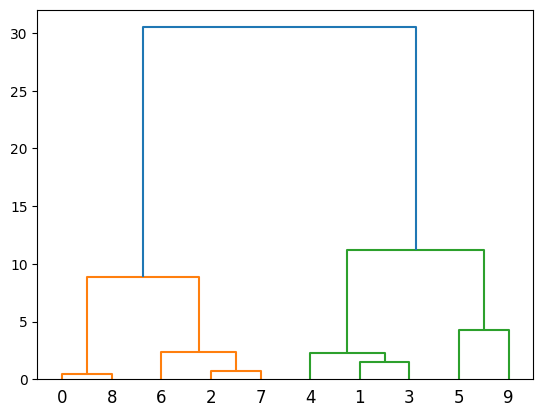

In [8]:
dendrogram(A)
plt.show()

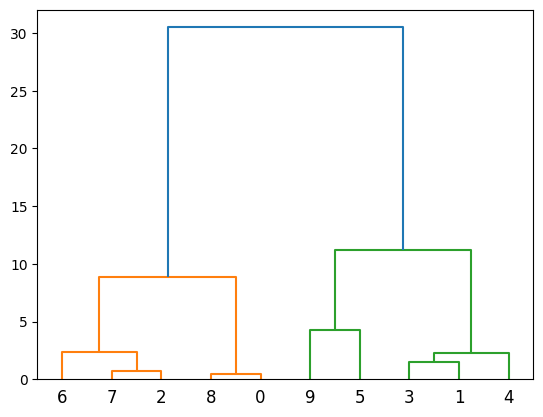

In [9]:
dendrogram(B)
plt.show()

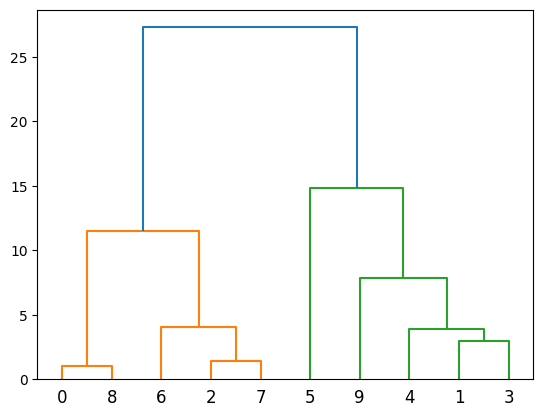

In [10]:
dendrogram(C)
plt.show()

## Current SciPy implementation

TIMING: 
CPU Execution time: 0.00040307199999967125 seconds


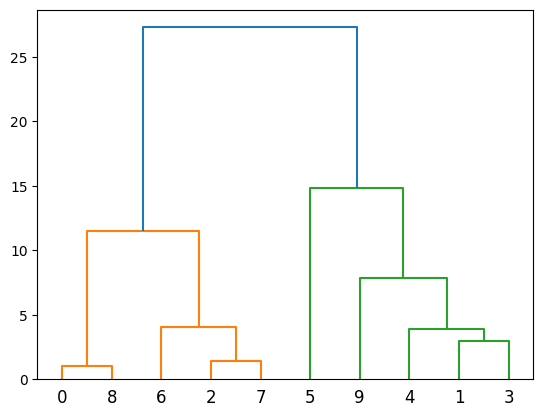

In [11]:
print("TIMING: ")
# get the start time
st = time.process_time()
########## FIX 
y = pdist(X) 
Z = ward(y)
##########
# get the end time
et = time.process_time()
# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

dendrogram(Z)
plt.show()

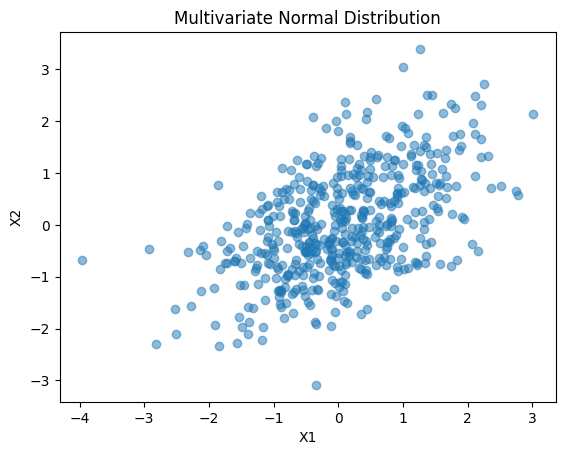

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = [0, 0]  # Mean of the distribution
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix

# Generate samples
samples = np.random.multivariate_normal(mean, cov, 500)

# Plotting the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()